# Explore and Analysis MEG & EEG Data

In [1]:
import sys
import os
import os.path as op
import numpy as np
import pandas as pd
sys.path.append("../")
from mne_path import PathHandler
ph = PathHandler()
from glob import glob
import random

import mne

%matplotlib inline

# Loading data

* MNE-Python package was created to work with Neuromag's FIF file format and data structures are based around the FIF file format from Neuromag, 

* Nevertheless, the package consists of reader functions for other data formats and to interface with many publicly available datasets

The downloaded `MNE-sample-data` contains EEG and MEG data from one subject performing an audiovisual experiment, along with structural MRI scans for that subject. 

This sample dataset selected for this analysis is `sample_audvis_filt-0-40_raw.fif` which has previously been filtered and downsampled.  The original raw data is `sample_audvis_raw.fif`.

In [2]:
SAMPLE_DATA_DIR = ph.cddir(ph.SAMPLE_DIR)

# list of all fif files in sample data
FIF_FILES = sorted(glob(op.join(SAMPLE_DATA_DIR, "**/**/*.fif")))

print("Total FIF Files: ", len(FIF_FILES))
display(FIF_FILES[:5])

Changed to:  /Users/jonghang/mne_data/MNE-sample-data
Total FIF Files:  36


['/Users/jonghang/mne_data/MNE-sample-data/MEG/sample/all-trans.fif',
 '/Users/jonghang/mne_data/MNE-sample-data/MEG/sample/ernoise-cov.fif',
 '/Users/jonghang/mne_data/MNE-sample-data/MEG/sample/ernoise_raw-eve.fif',
 '/Users/jonghang/mne_data/MNE-sample-data/MEG/sample/ernoise_raw.fif',
 '/Users/jonghang/mne_data/MNE-sample-data/MEG/sample/sample_audvis-ave.fif']

__Select a FIF File__

In [3]:
sample_data_raw_file = FIF_FILES[26]
print(sample_data_raw_file)

fif_raw = mne.io.read_raw_fif(sample_data_raw_file)

/Users/jonghang/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif
Opening raw data file /Users/jonghang/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


__Projection Items__

The Projection Items above are SSP projectors calculated to remove environmental noise from the MEG signals, plus a projector to mean-reference the EEG channels.  Details of these projections will be discussed in the future. 

In addition to the information displayed during loading, you can get a glimpse of the basic details of a Raw object by printing it; even more is available by printing its info attribute (a dictionary-like object that is preserved across Raw, Epochs, and Evoked objects). 

The info data structure keeps track of channel locations, applied filters, projectors, etc. Notice especially the chs entry, showing that MNE-Python detects different sensor types and handles each appropriately

# Power Spectral Density
__Built-In Plotting Methods__

Raw objects comes with several built-in plotting methods.  The following shows the use of `plot_psd` function to plot the power spectral density (PSD) for each sensor type with plot_psd, 

The function argument `fmax = 50` plot frequencies below 50 Hz because the selected data has been filtered with low-pass frequency of 40 Hz).

Additional materials are available as follow:

* [Case Studies in Neural Data Analysis](https://mark-kramer.github.io/Case-Studies-Python/03.html)
* [Compute source power spectral density (PSD) in a label](https://mne.tools/dev/auto_examples/time_frequency/source_power_spectrum.html).  This example contains tips on excluding bad channels

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 13.639 (s)


/Users/jonghang/opt/anaconda3/envs/torch311/lib/python3.11/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


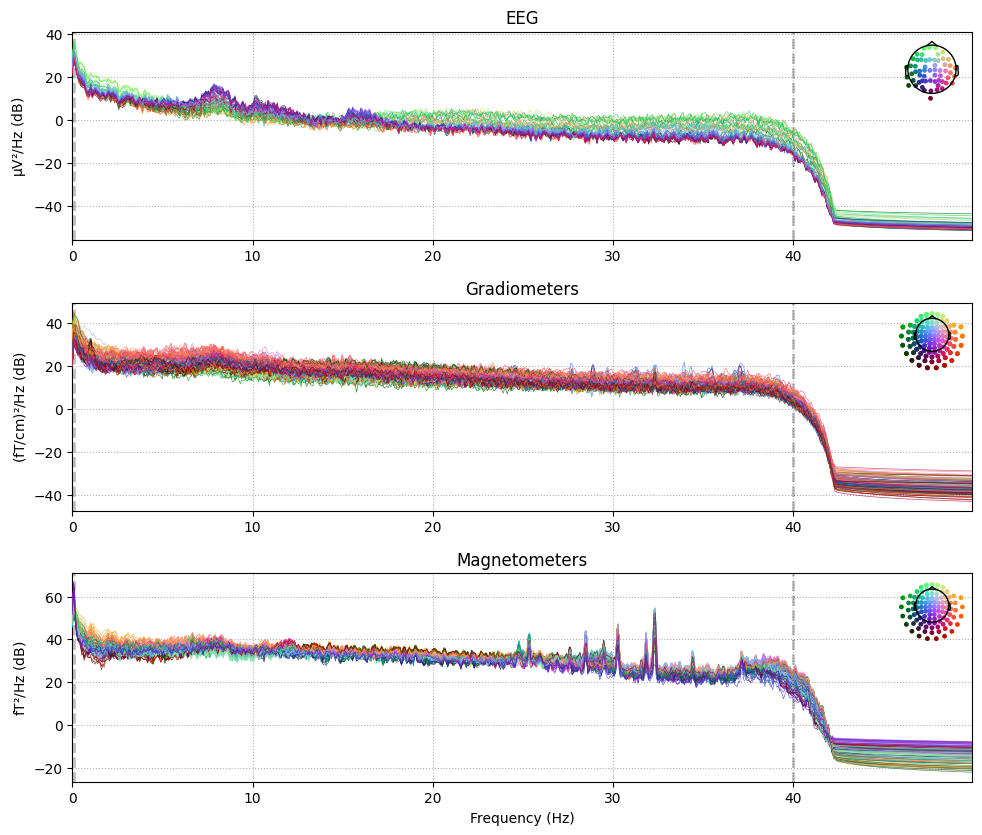

In [4]:
fif_raw.plot_psd(fmax = 50)

Using matplotlib as 2D backend.


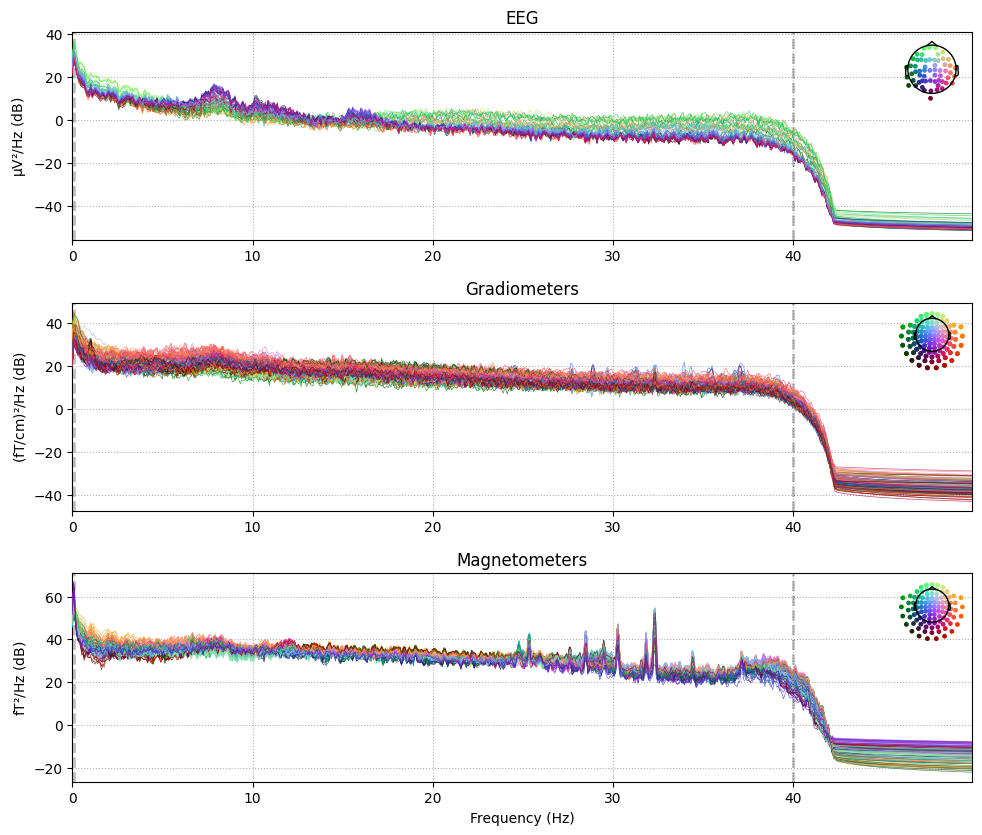

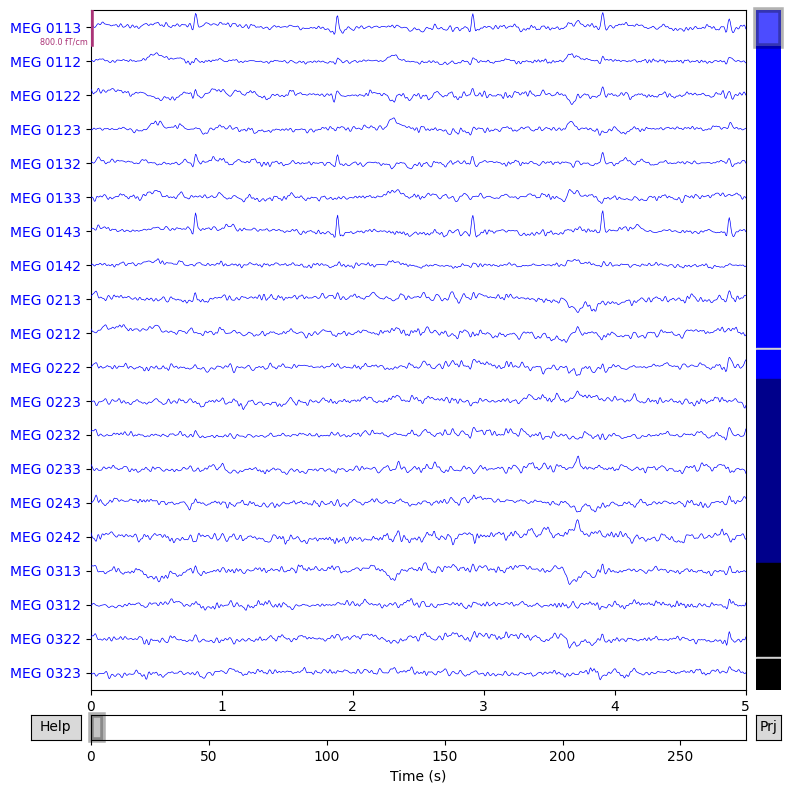

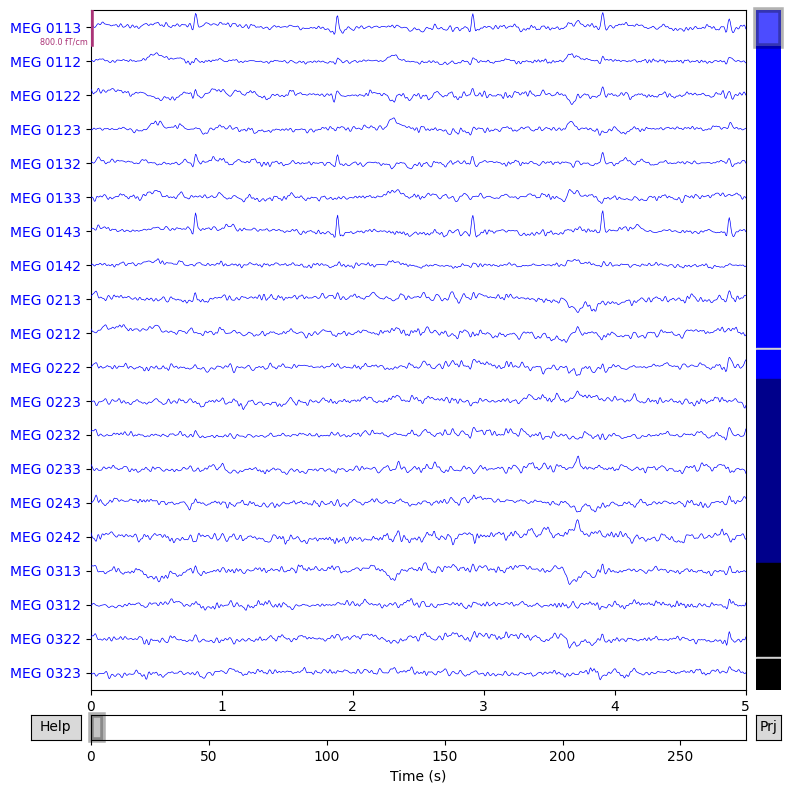

In [5]:
fif_raw.plot(duration = 5, n_channels = 20)